<a href="https://colab.research.google.com/github/Nikkiie/Data-analysis-pandas/blob/main/Fifa_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [ ]:
world_ranking = pd.read_csv('/content/fifa_ranking_2022-10-06 - fifa_ranking_2022-10-06.csv.csv')
world_cup = pd.read_csv('/content/world_cup - world_cup.csv.csv')
matches = pd.read_csv('/content/matches_1930_2022 - matches_1930_2022.csv.csv')

In [ ]:
matches.isnull().sum()

,0
home_team,0
away_team,0
home_score,0
home_xg,836
home_penalty,929
away_score,0
away_xg,836
away_penalty,929
home_manager,0
home_captain,320


In this its obvious that the data has null values

In [ ]:
world_cup.isnull().sum()

,0
Year,0
Host,0
Teams,0
Champion,0
Runner-Up,0
TopScorrer,0
Attendance,0
AttendanceAvg,0
Matches,0


In [ ]:
world_ranking.isnull().sum()

,0
team,0
team_code,0
association,0
rank,0
previous_rank,0
points,0
previous_points,0


In [ ]:
print(matches.duplicated().sum())
print(world_cup.duplicated().sum())
print(world_ranking.duplicated().sum())

0
0
0


In [ ]:
matches['home_team'].unique()

array(['Argentina', 'Croatia', 'France', 'Morocco', 'England',
       'Netherlands', 'Portugal', 'Japan', 'Brazil', 'Korea Republic',
       'Ghana', 'Cameroon', 'Serbia', 'Canada', 'Costa Rica', 'Australia',
       'Tunisia', 'Saudi Arabia', 'Poland', 'Ecuador', 'IR Iran', 'Wales',
       'Belgium', 'Spain', 'Qatar', 'Switzerland', 'Uruguay', 'Germany',
       'Denmark', 'Mexico', 'Senegal', 'United States', 'Sweden',
       'Russia', 'Colombia', 'Panama', 'Iceland', 'Nigeria', 'Peru',
       'Egypt', 'Algeria', 'Bosnia and Herzegovina', 'Honduras', 'Italy',
       'Greece', "Côte d'Ivoire", 'Chile', 'Paraguay', 'Korea DPR',
       'Slovakia', 'Slovenia', 'South Africa', 'New Zealand', 'Ukraine',
       'Togo', 'Czech Republic', 'Serbia and Montenegro', 'Angola',
       'Trinidad and Tobago', 'Türkiye', 'China PR',
       'Republic of Ireland', 'Romania', 'Scotland', 'FR Yugoslavia',
       'Jamaica', 'Bulgaria', 'Bolivia', 'Norway', 'West Germany',
       'Yugoslavia', 'Czechoslovaki

There are 3 entries for GER but its the same country so we can replace ger dr with west ger only.

In [ ]:
matches['home_team'] = matches['home_team'].apply(lambda x: x.replace('Germany DR','West Germany'))
matches['away_team'] = matches['away_team'].apply(lambda x: x.replace('Germany DR','West Germany'))

In [ ]:
matches.head(5)

,home_team,away_team,home_score,home_xg,home_penalty,away_score,away_xg,away_penalty,home_manager,home_captain,...,home_penalty_shootout_miss_long,away_penalty_shootout_miss_long,home_red_card,away_red_card,home_yellow_red_card,away_yellow_red_card,home_yellow_card_long,away_yellow_card_long,home_substitute_in_long,away_substitute_in_long
0,Argentina,France,3,3.3,4.0,3,2.2,2.0,Lionel Scaloni,Lionel Messi,...,NaN,"['3|1:1|Kingsley Coman', '5|2:1|Aurélien Tchou...",NaN,NaN,NaN,NaN,"['45+7&rsquor;|2:0|Enzo Fernández', '90+8&rsqu...","['55&rsquor;|2:0|Adrien Rabiot', '87&rsquor;|2...",['64&rsquor;|2:0|Marcos Acuña|for Ángel Di Mar...,['41&rsquor;|2:0|Randal Kolo Muani|for Ousmane...
1,Croatia,Morocco,2,0.7,NaN,1,1.2,NaN,Zlatko Dalić,Luka Modrić,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['69&rsquor;|2:1|Azzedine Ounahi', '84&rsquor;...",['61&rsquor;|2:1|Nikola Vlašić|for Andrej Kram...,['46&rsquor;|2:1|Ilias Chair|for Abdelhamid Sa...
2,France,Morocco,2,2.0,NaN,0,0.9,NaN,Didier Deschamps,Hugo Lloris,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,['27&rsquor;|1:0|Sofiane Boufal'],['65&rsquor;|1:0|Marcus Thuram|for Olivier Gir...,['21&rsquor;|1:0|Selim Amallah|for Romain Saïs...
3,Argentina,Croatia,3,2.3,NaN,0,0.5,NaN,Lionel Scaloni,Lionel Messi,...,NaN,NaN,NaN,NaN,NaN,NaN,"['68&rsquor;|2:0|Cristian Romero', '71&rsquor;...","['32&rsquor;|0:0|Mateo Kovačić', '32&rsquor;|0...",['62&rsquor;|2:0|Lisandro Martínez|for Leandro...,"['46&rsquor;|2:0|Mislav Oršić|for Borna Sosa',..."
4,Morocco,Portugal,1,1.4,NaN,0,0.9,NaN,Hoalid Regragui,Romain Saïss,...,NaN,NaN,NaN,NaN,Walid Cheddira · 90+3,NaN,"['70&rsquor;|1:0|Achraf Dari', '90+1&rsquor;|1...",['87&rsquor;|1:0|Vitinha'],['57&rsquor;|1:0|Achraf Dari|for Romain Saïss'...,['51&rsquor;|1:0|João Cancelo|for Raphaël Guer...


In [ ]:
#Total no of matches played till 2022

len(matches)

964

In [ ]:
# Total goals scored(penalty goals)

print(sum(matches['home_score'] + matches['away_score']))

2720


In [ ]:
# Avg goals scored per match

sum(matches['home_score'] + matches['away_score'])/len(matches)

2.8215767634854774

In [ ]:
# total attendance over time
sum(matches['Attendance'])

44048413

In [ ]:
# Avg attendance over time
sum(matches['Attendance'])/len(matches)

45693.3744813278

In [ ]:
world_cup.head()

,Year,Host,Teams,Champion,Runner-Up,TopScorrer,Attendance,AttendanceAvg,Matches
0,2022,Qatar,32,Argentina,France,Kylian Mbappé - 8,3404252,53191,64
1,2018,Russia,32,France,Croatia,Harry Kane - 6,3031768,47371,64
2,2014,Brazil,32,Germany,Argentina,James Rodríguez - 6,3429873,53592,64
3,2010,South Africa,32,Spain,Netherlands,"Wesley Sneijder, Thomas Müller... - 5",3178856,49670,64
4,2006,Germany,32,Italy,France,Miroslav Klose - 5,3352605,52384,64


In [ ]:
# times a country is winner and first or second runner up
winner = world_cup['Champion'].value_counts().reset_index()

In [ ]:
fig = px.pie(winner, values='count', names='Champion', title='No. of times country won fifa World Cup')


fig.update_traces(textinfo = 'label+value')
fig.show()

In [ ]:
# First runner up and second runner up

# for 2nd runner up we have to check it

In [ ]:
matches['Round'].unique()

array(['Final', 'Third-place match', 'Semi-finals', 'Quarter-finals',
       'Round of 16', 'Group stage', 'Second group stage',
       'First group stage', 'Second round', 'First round',
       'Group stage play-off', 'Final stage'], dtype=object)

In [ ]:
# removing nan from home_penalty
matches['home_penalty'].fillna(0 , inplace=True)
matches['away_penalty'].fillna(0 , inplace=True)

<ipython-input-20-67f44e852214>:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



<ipython-input-20-67f44e852214>:3: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[

In [ ]:
matches['h_total'] = matches['home_score'] + matches['home_penalty']
matches['a_total'] = matches['away_score'] + matches['away_penalty']

In [ ]:
# segregating these 2
Runner = matches[matches['Round']=='Final']
Third = matches[matches['Round']=='Third-place match']

In [ ]:
Third

,home_team,away_team,home_score,home_xg,home_penalty,away_score,away_xg,away_penalty,home_manager,home_captain,...,home_red_card,away_red_card,home_yellow_red_card,away_yellow_red_card,home_yellow_card_long,away_yellow_card_long,home_substitute_in_long,away_substitute_in_long,h_total,a_total
1,Croatia,Morocco,2,0.7,0.0,1,1.2,0.0,Zlatko Dalić,Luka Modrić,...,NaN,NaN,NaN,NaN,NaN,"['69&rsquor;|2:1|Azzedine Ounahi', '84&rsquor;...",['61&rsquor;|2:1|Nikola Vlašić|for Andrej Kram...,['46&rsquor;|2:1|Ilias Chair|for Abdelhamid Sa...,2.0,1.0
65,Belgium,England,2,1.5,0.0,0,1.0,0.0,Roberto Martínez,Eden Hazard,...,NaN,NaN,NaN,NaN,['90+3&rsquor;|2:0|Axel Witsel'],"['52&rsquor;|1:0|John Stones', '77&rsquor;|1:0...",['39&rsquor;|1:0|Thomas Vermaelen|for Nacer Ch...,['46&rsquor;|1:0|Jesse Lingard|for Danny Rose'...,2.0,0.0
129,Brazil,Netherlands,0,NaN,0.0,3,NaN,0.0,Luiz Felipe Scolari,NaN,...,NaN,NaN,NaN,NaN,"['2&rsquor;|0:0|Thiago Silva', '54&rsquor;|0:2...","['9&rsquor;|0:1|Arjen Robben', '36&rsquor;|0:2...",['46&rsquor;|0:2|Fernandinho|for Luiz Gustavo'...,['70&rsquor;|0:2|Daryl Janmaat|for Daley Blind...,0.0,3.0
193,Uruguay,Germany,2,NaN,0.0,3,NaN,0.0,Óscar Tabárez,NaN,...,NaN,NaN,NaN,NaN,['61&rsquor;|2:2|Diego Pérez'],"['5&rsquor;|0:0|Dennis Aogo', '90+2&rsquor;|2:...",['77&rsquor;|2:2|Walter Gargano|for Diego Pére...,"['73&rsquor;|2:2|Stefan Kießling|for Cacau', '...",2.0,3.0
257,Germany,Portugal,3,NaN,0.0,1,NaN,0.0,Jürgen Klinsmann,NaN,...,NaN,NaN,NaN,NaN,"['7&rsquor;|0:0|Torsten Frings', '78&rsquor;|2...","['24&rsquor;|0:0|Ricardo Costa', '33&rsquor;|0...",['65&rsquor;|2:0|Oliver Neuville|for Miroslav ...,"['46&rsquor;|0:0|Petit|for Costinha', '69&rsqu...",3.0,1.0
321,Korea Republic,Türkiye,2,NaN,0.0,3,NaN,0.0,Guus Hiddink,NaN,...,NaN,NaN,NaN,NaN,['23&rsquor;|1:2|Lee Eul-yong'],"['50&rsquor;|1:3|Tugay Kerimoğlu', '83&rsquor;...",['46&rsquor;|1:3|Kim Tae-young|for Hong Myung-...,['41&rsquor;|1:3|Hakan Ünsal|for Emre Belözoğl...,2.0,3.0
385,Netherlands,Croatia,1,NaN,0.0,2,NaN,0.0,Guus Hiddink,NaN,...,NaN,NaN,NaN,NaN,"['89&rsquor;|1:2|Wim Jonk', '89&rsquor;|1:2|Ed...","['34&rsquor;|1:1|Krunoslav Jurčić', '52&rsquor...",['46&rsquor;|1:2|Marc Overmars|for Phillip Coc...,['79&rsquor;|1:2|Goran Vlaović|for Robert Pros...,1.0,2.0
449,Sweden,Bulgaria,4,NaN,0.0,0,NaN,0.0,Tommy Svensson,Roland Nilsson,...,NaN,NaN,NaN,NaN,['82&rsquor;|4:0|Kennet Andersson'],['70&rsquor;|4:0|Zlatko Yankov'],['79&rsquor;|4:0|Anders Limpar|for Henrik Lars...,['42&rsquor;|4:0|Emil Kremenliev|for Trifon Iv...,4.0,0.0
501,Italy,England,2,NaN,0.0,1,NaN,0.0,Azeglio Vicini,Giuseppe Bergomi,...,NaN,NaN,NaN,NaN,NaN,NaN,['67&rsquor;|0:0|Nicola Berti|for Luigi De Ago...,"['72&rsquor;|1:0|Neil Webb|for Steve McMahon',...",2.0,1.0
553,France,Belgium,4,NaN,0.0,2,NaN,0.0,Henri Michel,Patrick Battiston,...,NaN,NaN,NaN,NaN,NaN,['63&rsquor;|2:1|Jean-Marie Pfaff'],['55&rsquor;|2:1|Maxime Bossis|for Yvon Le Rou...,['46&rsquor;|2:1|Franky Van der Elst|for Miche...,4.0,2.0


In [ ]:
# from the runner taking out which is the runner team
def get_runner_up(row):
  if( row['h_total'] > row['a_total']):
    return row['away_team']
  else:
    return row['home_team']

# same for 3rd place

def get_third_up(row):
  if( row['h_total'] > row['a_total']):
    return row['home_team']
  else:
    return row['away_team']

In [ ]:
Runner['Runner_up'] = Runner.apply(get_runner_up, axis=1)
Third['Third_place'] = Third.apply(get_third_up, axis=1)

<ipython-input-25-ae55b2b99cc5>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-25-ae55b2b99cc5>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
Runner['Runner_up'].value_counts()

,count
Runner_up,
Argentina,3
Netherlands,3
West Germany,3
France,2
Italy,2
Czechoslovakia,2
Hungary,2
Croatia,1
Germany,1


In [ ]:
trace1 = go.Bar(x=Runner['Runner_up'].value_counts().index, y=Runner['Runner_up'].value_counts(),name = 'First Runner Up')
trace2 = go.Bar(x=Third['Third_place'].value_counts().index, y=Third['Third_place'].value_counts(),name = 'Second Runner Up')

In [ ]:
fig = make_subplots(rows=1, cols= 2, subplot_titles=('First Runner Up','Second Runner Up'))
fig.add_trace(trace1, row=1, col=1)
fig.add_trace(trace2, row=1, col=2)

## Conclusion

Brazil won most of matches followed by italy.

Argentina won most number of runner up and Netherlands.

Germany was 2nd runner up

In [ ]:
# in which yr particular team participated

data = matches.groupby('Year').agg(home=('home_team', list), away=('away_team',list))

In [ ]:
data

,home,away
Year,,
1930,"[Uruguay, Uruguay, Argentina, Argentina, Urugu...","[Argentina, Yugoslavia, United States, Chile, ..."
1934,"[Italy, Germany, Czechoslovakia, Italy, Italy,...","[Czechoslovakia, Austria, Germany, Austria, Sp..."
1938,"[Brazil, Italy, Hungary, Italy, Brazil, Sweden...","[Sweden, Hungary, Sweden, Brazil, Czechoslovak..."
1950,"[Sweden, Uruguay, Brazil, Uruguay, Brazil, Uru...","[Spain, Brazil, Spain, Sweden, Sweden, Spain, ..."
1954,"[Germany, Austria, Hungary, Germany, Germany, ...","[Hungary, Uruguay, Uruguay, Austria, Yugoslavi..."
1958,"[Brazil, France, Sweden, Brazil, France, West ...","[Sweden, West Germany, West Germany, France, N..."
1962,"[Brazil, Chile, Brazil, Czechoslovakia, Chile,...","[Czechoslovakia, Yugoslavia, Chile, Yugoslavia..."
1966,"[England, Portugal, England, West Germany, Por...","[West Germany, Soviet Union, Portugal, Soviet ..."
1970,"[Brazil, West Germany, Italy, Brazil, Brazil, ...","[Italy, Uruguay, West Germany, Uruguay, Peru, ..."


In [ ]:
# concatinating
data['teams'] = data.apply(lambda x : list(set(x['home'] + x['away'])), axis=1)

# set is used to remove duplicate

In [ ]:
data['#'] = data['teams'].apply(len)

In [ ]:
data_pivot = data['teams'].explode().reset_index().pivot(index='Year', columns='teams', values='Year')

In [ ]:
data_pivot.fillna(0, inplace=True)

In [ ]:
data_pivot = data_pivot.applymap(lambda x: 1 if x > 0 else 0)

<ipython-input-35-037cc89821d0>:1: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



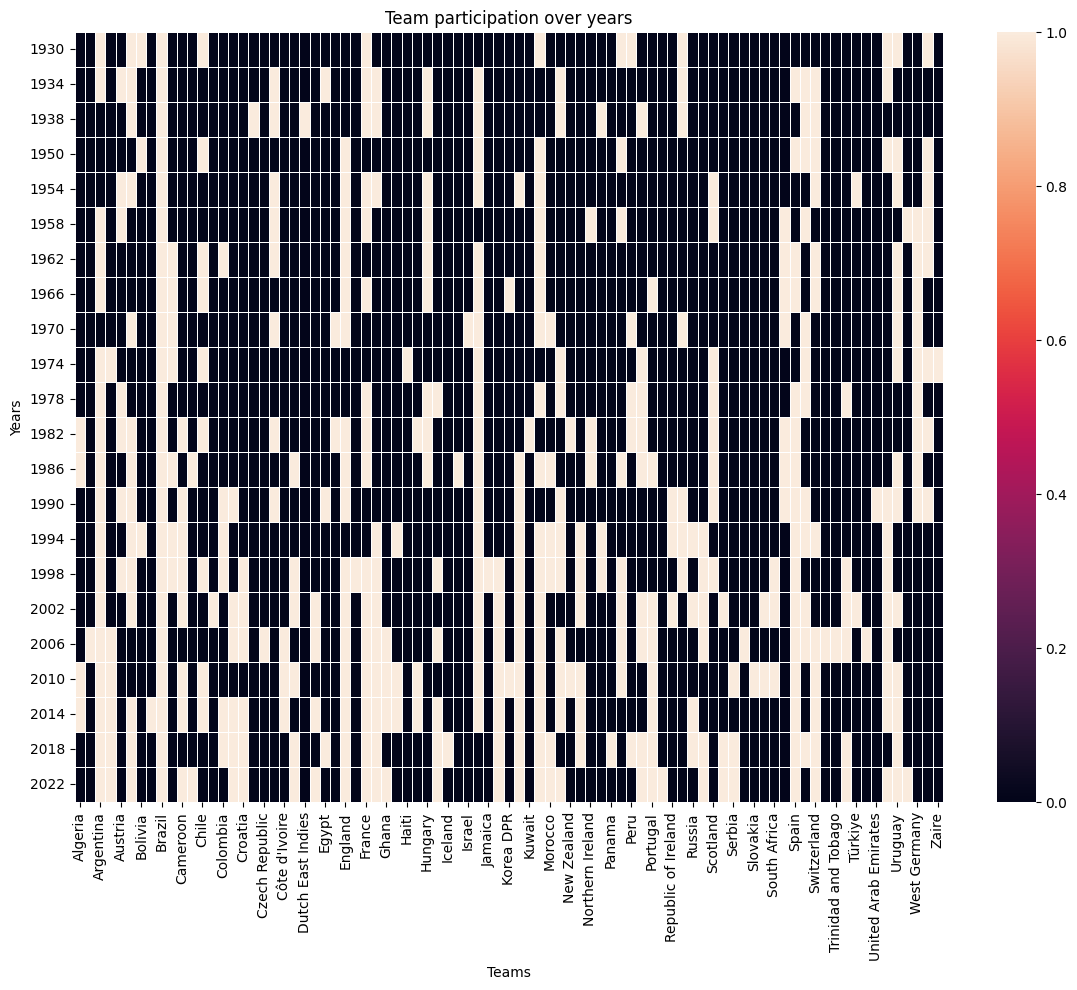

In [ ]:
plt.figure(figsize=(14,10))
sns.heatmap(data_pivot, linecolor = 'white', linewidth=0.5)
plt.title('Team participation over years')
plt.xlabel('Teams')
plt.ylabel('Years')
plt.show()

Brazil has Participated all over the years

In [ ]:
# checking for which team rank increased, decreased or remained same

same_rank = world_ranking[world_ranking['rank']==world_ranking['previous_rank']]['team'].tolist()
Rank_decreased = world_ranking[world_ranking['rank'] > world_ranking['previous_rank']]['team'].tolist()
Rank_increased = world_ranking[world_ranking['rank'] < world_ranking['previous_rank']]['team'].tolist()

In [ ]:
# making dataframe for above but as the len of eacj is not equal first making it equal by adding none wherever the data is less

max_length = max(len(same_rank), len(Rank_decreased), len(Rank_increased))

In [ ]:
same_rank = same_rank + [None]*(max_length - len(same_rank))
Rank_decreased = Rank_decreased + [None]*(max_length - len(Rank_decreased))
Rank_increased = Rank_increased + [None]*(max_length - len(Rank_increased))

In [ ]:
same_rank

['Brazil',
 'Belgium',
 'Argentina',
 'France',
 'England',
 'Netherlands',
 'Portugal',
 'Denmark',
 'Germany',
 'Colombia',
 'Senegal',
 'Wales',
 'Japan',
 'Poland',
 'Ukraine',
 'Korea Republic',
 'Chile',
 'Tunisia',
 'Ecuador',
 'Mali',
 'Albania',
 'Oman',
 'Israel',
 'Uzbekistan',
 'Honduras',
 'Guinea',
 'Bahrain',
 'Benin',
 'Palestine',
 'Kyrgyz Republic',
 'Equatorial Guinea',
 'Thailand',
 'Korea DPR',
 'Guatemala',
 'Turkmenistan',
 'Ethiopia',
 'St Kitts and Nevis',
 'Burundi',
 'Kuwait',
 'Liberia',
 'Chinese Taipei',
 'Myanmar',
 'Tahiti',
 'Fiji',
 'Vanuatu',
 'South Sudan',
 'Barbados',
 'Cuba',
 'Puerto Rico',
 'Mauritius',
 'Chad',
 'Macau',
 'American Samoa',
 'Cook Islands',
 'Brunei Darussalam',
 'Samoa',
 'Bangladesh',
 'Djibouti',
 'Tonga',
 'Guam',
 'Turks and Caicos Islands',
 'Sri Lanka',
 'US Virgin Islands',
 'British Virgin Islands',
 'Anguilla',
 'San Marino',
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [ ]:
df = pd.DataFrame({'Same_rank':same_rank, 'Rank_decreased':Rank_decreased, 'Rank_increased':Rank_increased})

In [48]:
df

,Same_rank,Rank_decreased,Rank_increased
0,Brazil,Spain,Italy
1,Belgium,Mexico,Croatia
2,Argentina,Uruguay,Switzerland
3,France,USA,IR Iran
4,England,Peru,Serbia
...,...,...,...
72,None,None,Timor-Leste
73,None,None,Eritrea
74,None,None,Aruba
75,None,None,Bahamas


In [49]:
df.isnull().sum()

,0
Same_rank,11
Rank_decreased,9
Rank_increased,0


In [50]:
# filling null values with blank

df.fillna('', inplace=True)

In [56]:
# Function to check rank increase or decrease

def find_rank(Country):
    result = []
    for column in df.columns:
      matches = df[column] == Country
      if matches.any():
        result.append(column)
    return result

find_rank('Argentina')

['Same_rank']

## Advance EDA

In [ ]:
# probablity of a team winning knockout matches

In [59]:
country = 'Argentina'

# final
# semi final
# quarter final

In [62]:
matches['Round'].unique()

array(['Final', 'Third-place match', 'Semi-finals', 'Quarter-finals',
       'Round of 16', 'Group stage', 'Second group stage',
       'First group stage', 'Second round', 'First round',
       'Group stage play-off', 'Final stage'], dtype=object)

In [65]:
data = matches[((matches['home_team']==country) | (matches['away_team']==country))
& ((matches['Round']=='Final') | (matches['Round']=='Semi-final') | (matches['Round']=='Quarter-finals'))]

In [66]:
data['Round'].value_counts()

,count
Round,
Quarter-finals,8
Final,6
